In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# All imports
import os
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import KFold
from tqdm import tqdm
from PIL import Image
from torchvision.models import ResNet18_Weights
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
!pip install lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
from torch.utils.data import random_split

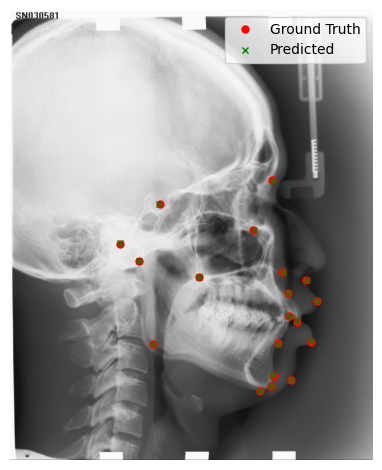

In [ ]:
# display the image with true landmarks

DIR = '/content/drive/My Drive/AML/data'
IMAGE_IDX = 0 # Change which image is visualized
SAVE_PATH = './example.png'

# Function to visualize an image with landmarks
def visualize_landmarks(image, predicted_landmarks, ground_truth=None, save_path=None):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image, cmap="gray")

    # Plot the landmarks as red dots on the image
    if ground_truth is not None:
        for x, y in ground_truth:
            ax.plot(x, y, 'ro', markersize=5, label='Ground Truth' if 'Ground Truth' not in ax.get_legend_handles_labels()[1] else "")

    # Plot the predicted-landmarks as green dots on the image
    for x, y in predicted_landmarks:
        ax.plot(x, y, 'gx', markersize=5, label='Predicted' if 'Predicted' not in ax.get_legend_handles_labels()[1] else "")

    ax.axis('off')
    if ground_truth is not None:
        ax.legend(loc='upper right')

    plt.tight_layout()

    # put show
    plt.show()

    # Save the annotated image
    fig.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

if __name__ == '__main__':
    csv_file = f'{DIR}/landmarks.csv'
    # Read the CSV into a DataFrame
    df = pd.read_csv(csv_file, dtype={'image_path': str})

    # Extract the image name
    image_name = df.loc[IMAGE_IDX, 'image_path']

    # Extract landmarks
    gt_landmarks = df.iloc[IMAGE_IDX, 1:].values.astype(float).reshape(-1, 2)

    # Open the image
    image = Image.open(f'{DIR}/cepha400/cepha400/{image_name}')


    # Simulate predicted landmarks by adding some noise to the ground truth
    noise = np.random.normal(0, 2, gt_landmarks.shape)  # standard deviation = 2 pixels
    predicted_landmarks = gt_landmarks + noise

    # Visualize predicted + ground truth landmarks
    visualize_landmarks(image, predicted_landmarks, ground_truth=gt_landmarks, save_path=SAVE_PATH)

FOLD 1
--------------------------------
Number of training images: 320
Number of validation images: 80


100%|██████████| 10/10 [00:16<00:00,  1.70s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.44 pixels
Epoch 1, Train Loss: 0.1259, Val Loss: 0.1021
--------------------------------
Saving best model with validation loss: 0.1021


100%|██████████| 10/10 [00:15<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.17 pixels
Epoch 2, Train Loss: 0.0049, Val Loss: 0.0145
--------------------------------
Saving best model with validation loss: 0.0145


100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.07 pixels
Epoch 3, Train Loss: 0.0021, Val Loss: 0.0027
--------------------------------
Saving best model with validation loss: 0.0027


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.05 pixels
Epoch 4, Train Loss: 0.0018, Val Loss: 0.0017
--------------------------------
Saving best model with validation loss: 0.0017


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.05 pixels
Epoch 5, Train Loss: 0.0020, Val Loss: 0.0012
--------------------------------
Saving best model with validation loss: 0.0012


100%|██████████| 10/10 [00:15<00:00,  1.57s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 6, Train Loss: 0.0017, Val Loss: 0.0010
--------------------------------
Saving best model with validation loss: 0.0010


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 7, Train Loss: 0.0015, Val Loss: 0.0009
--------------------------------
Saving best model with validation loss: 0.0009


100%|██████████| 10/10 [00:15<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 8, Train Loss: 0.0013, Val Loss: 0.0009
--------------------------------
Saving best model with validation loss: 0.0009


100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 9, Train Loss: 0.0010, Val Loss: 0.0009
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.05 pixels
Epoch 10, Train Loss: 0.0008, Val Loss: 0.0011
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 11, Train Loss: 0.0008, Val Loss: 0.0010
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 12, Train Loss: 0.0007, Val Loss: 0.0006
--------------------------------
Saving best model with validation loss: 0.0006


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 13, Train Loss: 0.0006, Val Loss: 0.0007
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 14, Train Loss: 0.0005, Val Loss: 0.0005
--------------------------------
Saving best model with validation loss: 0.0005


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 15, Train Loss: 0.0005, Val Loss: 0.0006
--------------------------------
FOLD 2
--------------------------------
Number of training images: 320
Number of validation images: 80


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.41 pixels
Epoch 1, Train Loss: 0.1364, Val Loss: 0.0849
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.26 pixels
Epoch 2, Train Loss: 0.0098, Val Loss: 0.0341
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.21 pixels
Epoch 3, Train Loss: 0.0032, Val Loss: 0.0215
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.13 pixels
Epoch 4, Train Loss: 0.0016, Val Loss: 0.0093
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.11 pixels
Epoch 5, Train Loss: 0.0011, Val Loss: 0.0057
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.07 pixels
Epoch 6, Train Loss: 0.0009, Val Loss: 0.0029
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 7, Train Loss: 0.0008, Val Loss: 0.0010
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 8, Train Loss: 0.0008, Val Loss: 0.0009
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 9, Train Loss: 0.0008, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 10, Train Loss: 0.0008, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 11, Train Loss: 0.0008, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 12, Train Loss: 0.0008, Val Loss: 0.0009
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 13, Train Loss: 0.0007, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.68s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 14, Train Loss: 0.0007, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 15, Train Loss: 0.0007, Val Loss: 0.0007
--------------------------------
FOLD 3
--------------------------------
Number of training images: 320
Number of validation images: 80


100%|██████████| 10/10 [00:17<00:00,  1.71s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 1.71 pixels
Epoch 1, Train Loss: 0.0898, Val Loss: 1.5019
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.14 pixels
Epoch 2, Train Loss: 0.0037, Val Loss: 0.0102
--------------------------------


100%|██████████| 10/10 [00:17<00:00,  1.74s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.12 pixels
Epoch 3, Train Loss: 0.0015, Val Loss: 0.0080
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.57s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.14 pixels
Epoch 4, Train Loss: 0.0011, Val Loss: 0.0100
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.10 pixels
Epoch 5, Train Loss: 0.0012, Val Loss: 0.0062
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.09 pixels
Epoch 6, Train Loss: 0.0010, Val Loss: 0.0046
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.05 pixels
Epoch 7, Train Loss: 0.0010, Val Loss: 0.0017
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 8, Train Loss: 0.0008, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:17<00:00,  1.72s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 9, Train Loss: 0.0007, Val Loss: 0.0007
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 10, Train Loss: 0.0008, Val Loss: 0.0009
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 11, Train Loss: 0.0007, Val Loss: 0.0007
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.68s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 12, Train Loss: 0.0007, Val Loss: 0.0006
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 13, Train Loss: 0.0007, Val Loss: 0.0007
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 14, Train Loss: 0.0008, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 15, Train Loss: 0.0006, Val Loss: 0.0007
--------------------------------
FOLD 4
--------------------------------
Number of training images: 320
Number of validation images: 80


100%|██████████| 10/10 [00:15<00:00,  1.57s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.55 pixels
Epoch 1, Train Loss: 0.1249, Val Loss: 0.1554
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.19 pixels
Epoch 2, Train Loss: 0.0042, Val Loss: 0.0195
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.57s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.09 pixels
Epoch 3, Train Loss: 0.0014, Val Loss: 0.0038
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.07 pixels
Epoch 4, Train Loss: 0.0010, Val Loss: 0.0025
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.68s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.05 pixels
Epoch 5, Train Loss: 0.0009, Val Loss: 0.0013
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 6, Train Loss: 0.0006, Val Loss: 0.0009
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 7, Train Loss: 0.0005, Val Loss: 0.0010
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 8, Train Loss: 0.0005, Val Loss: 0.0007
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 9, Train Loss: 0.0004, Val Loss: 0.0005
--------------------------------
Saving best model with validation loss: 0.0005


100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 10, Train Loss: 0.0004, Val Loss: 0.0005
--------------------------------


100%|██████████| 10/10 [00:15<00:00,  1.57s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 11, Train Loss: 0.0003, Val Loss: 0.0004
--------------------------------
Saving best model with validation loss: 0.0004


100%|██████████| 10/10 [00:16<00:00,  1.66s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 12, Train Loss: 0.0003, Val Loss: 0.0004
--------------------------------
Saving best model with validation loss: 0.0004


100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 13, Train Loss: 0.0003, Val Loss: 0.0004
--------------------------------
Saving best model with validation loss: 0.0004


100%|██████████| 10/10 [00:17<00:00,  1.74s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.03 pixels
Epoch 14, Train Loss: 0.0003, Val Loss: 0.0004
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.02 pixels
Epoch 15, Train Loss: 0.0003, Val Loss: 0.0003
--------------------------------
Saving best model with validation loss: 0.0003
FOLD 5
--------------------------------
Number of training images: 320
Number of validation images: 80


100%|██████████| 10/10 [00:17<00:00,  1.71s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.87 pixels
Epoch 1, Train Loss: 0.1368, Val Loss: 0.3885
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.22 pixels
Epoch 2, Train Loss: 0.0051, Val Loss: 0.0241
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.16 pixels
Epoch 3, Train Loss: 0.0018, Val Loss: 0.0122
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.07 pixels
Epoch 4, Train Loss: 0.0013, Val Loss: 0.0026
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.07 pixels
Epoch 5, Train Loss: 0.0010, Val Loss: 0.0027
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.07 pixels
Epoch 6, Train Loss: 0.0009, Val Loss: 0.0023
--------------------------------


100%|██████████| 10/10 [00:17<00:00,  1.73s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 7, Train Loss: 0.0009, Val Loss: 0.0009
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 8, Train Loss: 0.0008, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.65s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 9, Train Loss: 0.0008, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 10, Train Loss: 0.0007, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 11, Train Loss: 0.0007, Val Loss: 0.0007
--------------------------------


100%|██████████| 10/10 [00:17<00:00,  1.74s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 12, Train Loss: 0.0007, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 13, Train Loss: 0.0006, Val Loss: 0.0007
--------------------------------


100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 14, Train Loss: 0.0005, Val Loss: 0.0008
--------------------------------


100%|██████████| 10/10 [00:17<00:00,  1.75s/it]


Current Learning Rate: 0.001
Validation RMSE per image: 0.04 pixels
Epoch 15, Train Loss: 0.0005, Val Loss: 0.0011
--------------------------------


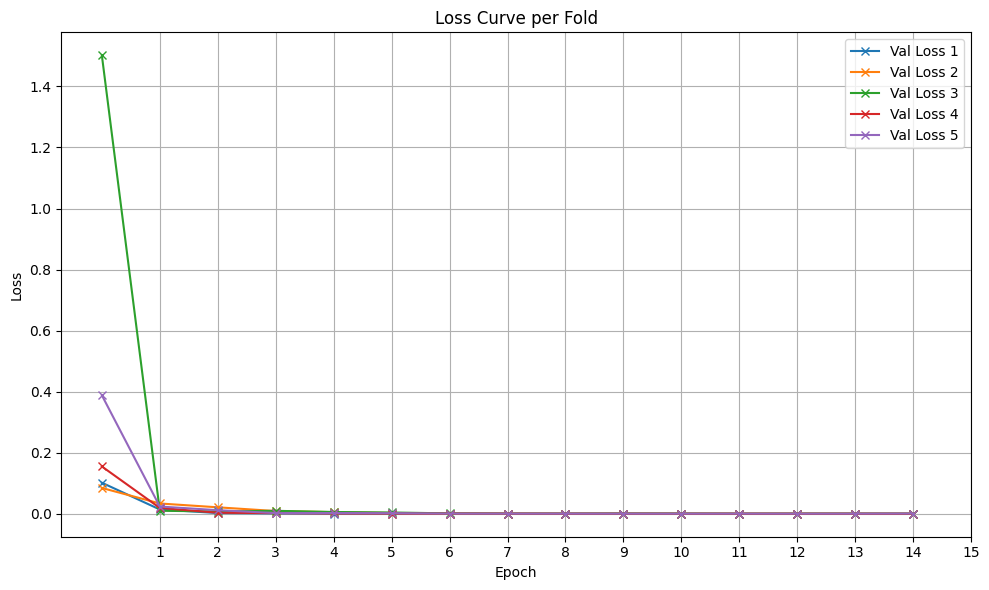


Fold Results
--------------------------------
Fold 1: Validation Loss = 0.0006
--------------------------------
Fold 2: Validation Loss = 0.0007
--------------------------------
Fold 3: Validation Loss = 0.0007
--------------------------------
Fold 4: Validation Loss = 0.0003
--------------------------------
Fold 5: Validation Loss = 0.0011
--------------------------------
Average Validation Loss: 0.0007


  0%|          | 0/1000 [00:00<?, ?it/s]

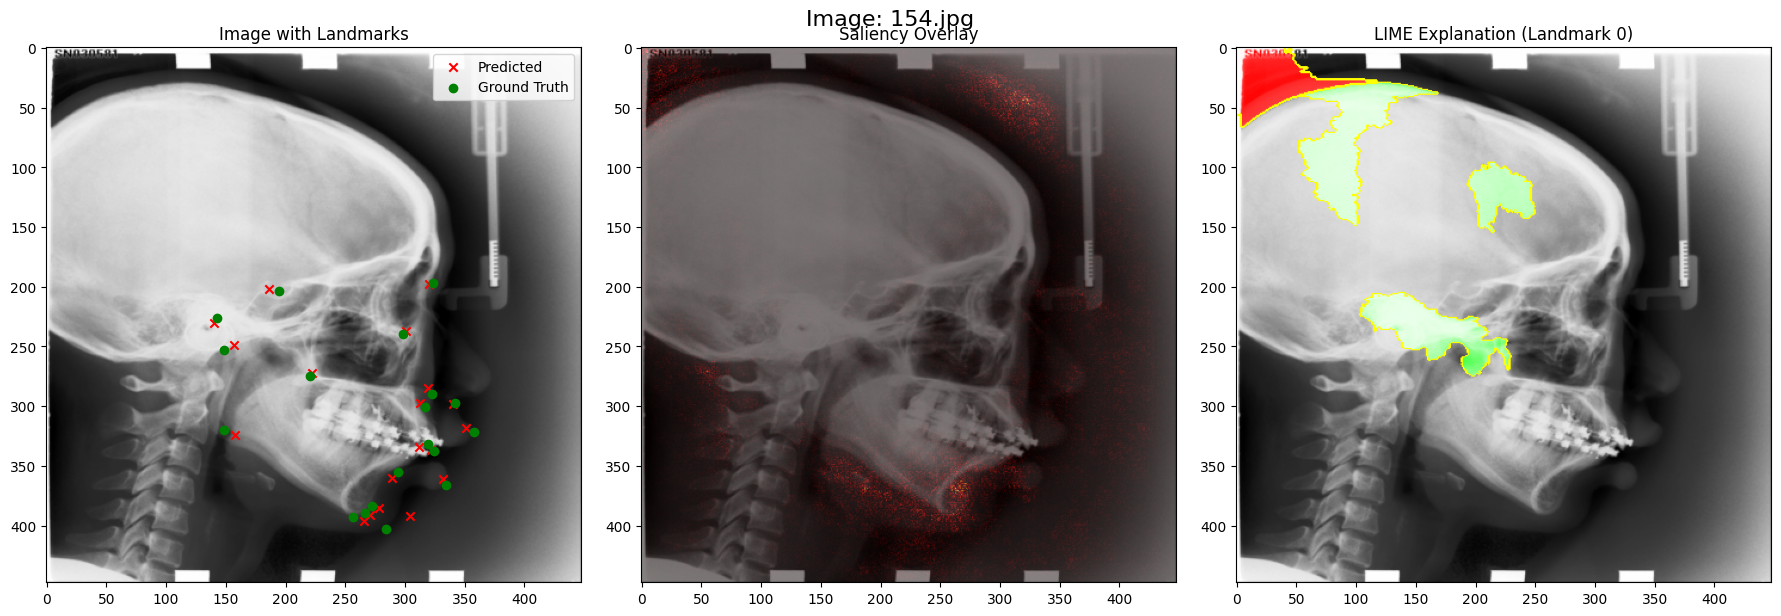

  0%|          | 0/1000 [00:00<?, ?it/s]

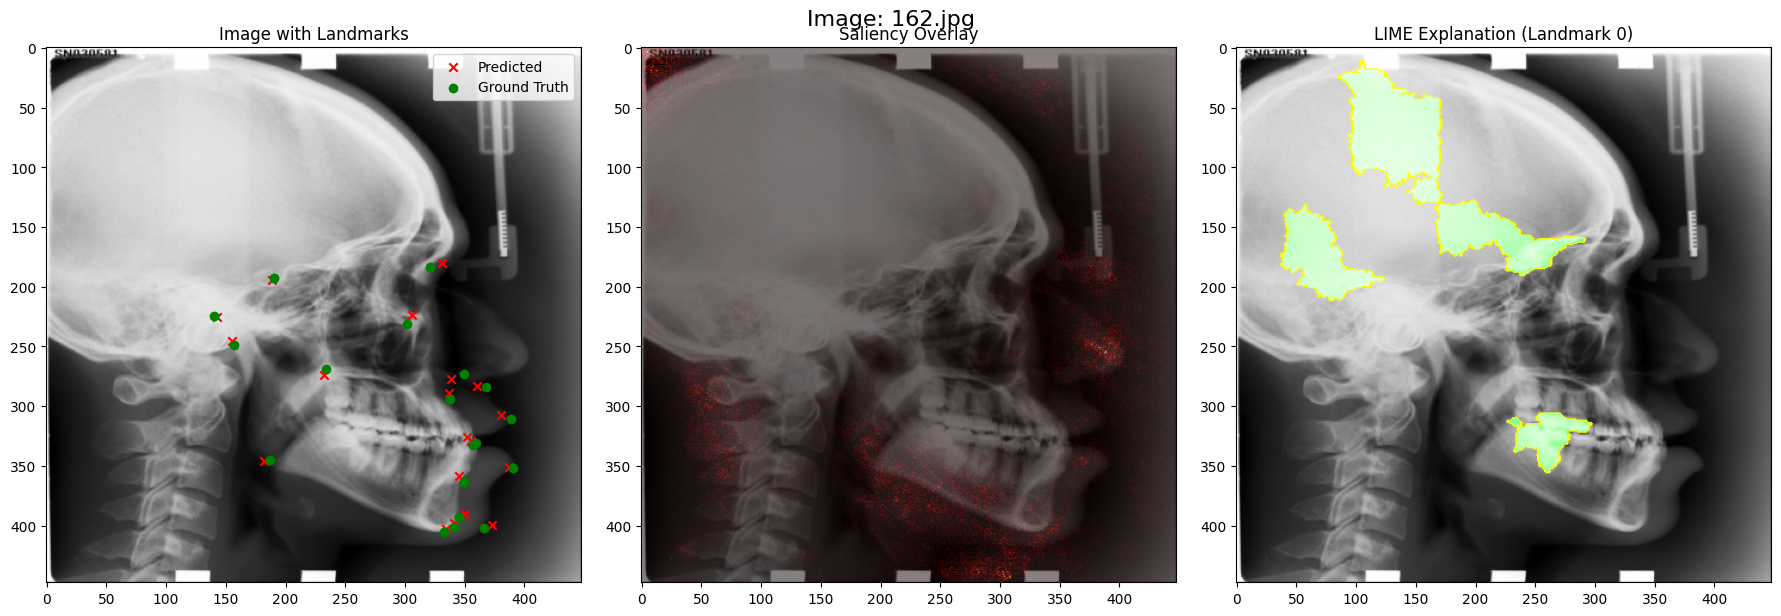

  0%|          | 0/1000 [00:00<?, ?it/s]

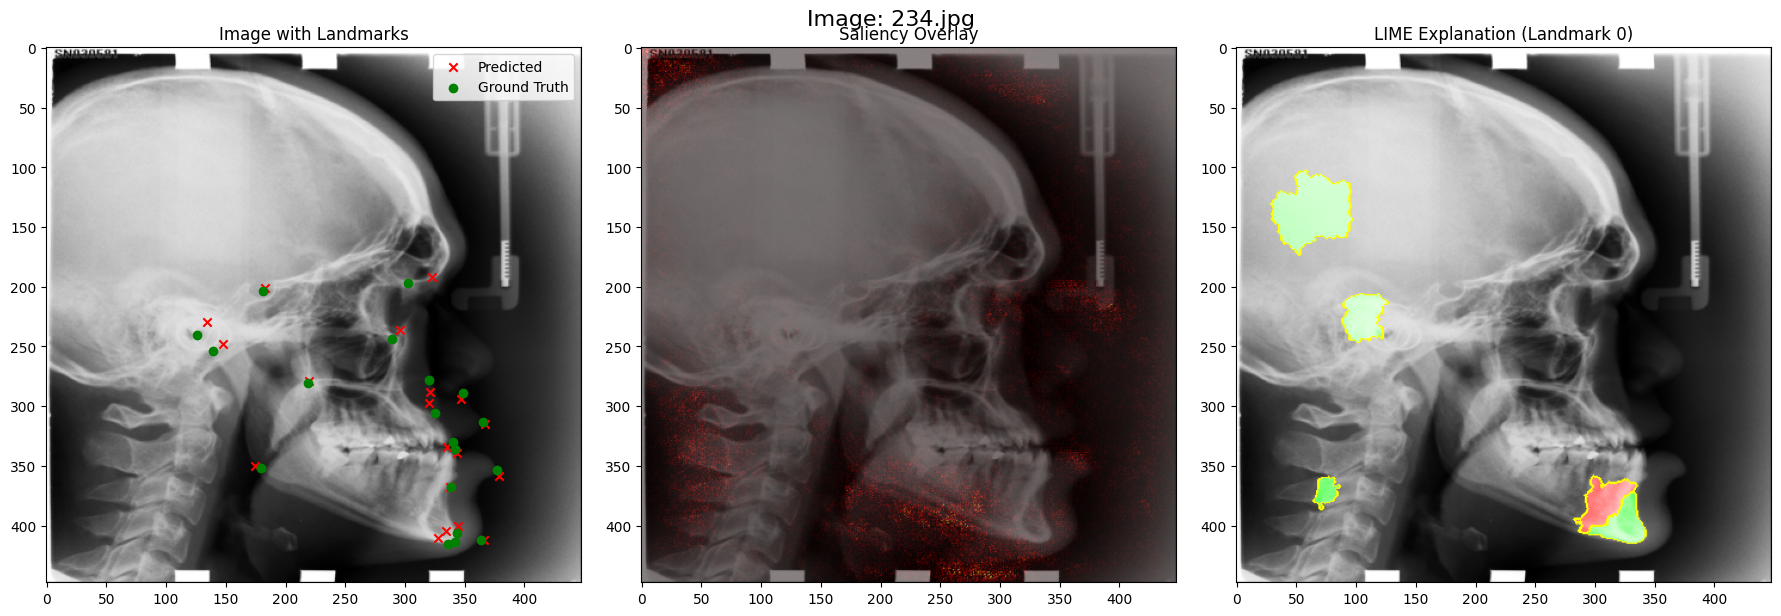

In [ ]:
# Configuration
DATA_DIR = '/content/drive/My Drive/AML/data'
CSV_NAME = 'landmarks.csv'
BATCH_SIZE = 32
EPOCHS = 15
LEARNING_RATE = 1e-3
NUM_FOLDS = 5
K_FOLD = True # Whether to run k-fold cross validation or not
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
OUTPUT_DIR = './results'
BEST_MODEL_PATH = f"{OUTPUT_DIR}/best_model.pth"
WIDTH = 448
HEIGHT = 448

class LandmarkDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir,'cepha400', 'cepha400', row["image_path"])

        image = Image.open(img_path).convert('L')
        landmarks = row[1:].values.astype(np.float32).reshape(-1, 2)

        # Normalize landmarks
        width, height = image.size
        landmarks[:, 0] /= width
        landmarks[:, 1] /= height

        if self.transform:
            image = self.transform(image)

        return image, landmarks.flatten(), row["image_path"]

# Data augmentation
train_transform = transforms.Compose([
    transforms.Resize((WIDTH, HEIGHT)),
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomRotation(degrees=10),  # rotate randomly within ±10°
    # transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)),  # allow small shifting
    # transforms.ColorJitter(brightness=0.1, contrast=0.1),  # slightly change brightness & contrast
    transforms.ToTensor(),
])

val_transform = transforms.Compose([
    transforms.Resize((WIDTH, HEIGHT)),
    transforms.ToTensor(),
])

# Load the dataset
dataset = LandmarkDataset(csv_file=os.path.join(DATA_DIR, CSV_NAME),
                          img_dir=DATA_DIR, transform=None)

# Define model
class LandmarkModel(nn.Module):
    def __init__(self):
        super(LandmarkModel, self).__init__()
        self.backbone = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
        self.backbone.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False) # 1-channel grayscale input
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, 19*2)  # 19 landmarks (x, y)

    def forward(self, x):
        return self.backbone(x)

# Training function
def train_model(model, train_loader, criterion, optimizer, scheduler):
    model.train()
    total_loss = 0
    for images, targets, _ in tqdm(train_loader):
        images, targets = images.to(DEVICE), targets.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    for param_group in optimizer.param_groups:
        print(f"Current Learning Rate: {param_group['lr']}")
    scheduler.step(total_loss / len(train_loader))
    return total_loss / len(train_loader)

def validate_model(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    total_image_rmse = 0
    total_images = 0

    with torch.no_grad():
        for images, targets, _ in val_loader:
            images, targets = images.to(DEVICE), targets.to(DEVICE)
            outputs = model(images)

            # MSE loss
            loss = criterion(outputs, targets)
            total_loss += loss.item()

            # RMSE per image (whole landmark set per image)
            outputs_np = outputs.cpu().numpy().reshape(len(images), -1, 2)
            targets_np = targets.cpu().numpy().reshape(len(images), -1, 2)

            dists = np.linalg.norm(outputs_np - targets_np, axis=2)  # shape: (batch_size, num_points)
            rmse_per_image = np.sqrt((dists ** 2).mean(axis=1))  # average RMSE per image
            total_image_rmse += rmse_per_image.sum()
            total_images += len(images)

    avg_loss = total_loss / len(val_loader)
    avg_rmse = total_image_rmse / total_images

    print(f"Validation RMSE per image: {avg_rmse:.2f} pixels")
    return avg_loss

# Save the best model
def save_best_model(model, val_loss, best_val_loss, model_path):
    if val_loss < best_val_loss:
        if not os.path.exists(OUTPUT_DIR):
            os.makedirs(OUTPUT_DIR)
        print(f"Saving best model with validation loss: {val_loss:.4f}")
        torch.save(model.state_dict(), model_path)
        return val_loss
    return best_val_loss

# LIME Wrapper
class LandmarkRegressionWrapper:
    def __init__(self, model, target_idx):
        self.model = model
        self.target_idx = target_idx

    def __call__(self, images):
        self.model.eval()
        images = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2)
        images = images[:, 0:1, :, :]  # Grayscale
        images = images.to(DEVICE)

        with torch.no_grad():
            outputs = self.model(images)

        preds = outputs[:, self.target_idx].detach().cpu().numpy()

        # Convert to shape (n_samples, 1) as required by lime
        return preds.reshape(-1, 1)


# Run inference on trained model
def inference(model, num_image_to_show=3):
    model.load_state_dict(torch.load(BEST_MODEL_PATH))
    model.eval()

    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    shown = 0
    for i, (images, targets, image_names) in enumerate(val_loader):
        images = images.to(DEVICE)

        images.requires_grad_()  # Enable gradients

        outputs = model(images)

        output_scalar = outputs.sum()

        # Zero gradients
        model.zero_grad()

        # Backprop to get the gradient of the output with respect to input image
        output_scalar.backward()

        saliency = images.grad.abs().detach().cpu()
        saliency, _ = torch.max(saliency, dim=1)  # take the maximum along the channel dimension

        for j in range(images.shape[0]):
            if shown >= num_image_to_show:
                return

            image = images[j].cpu()
            image_pil = F.to_pil_image(image)
            image_name = image_names[j]

            predicted_landmarks = outputs[j].detach().cpu().numpy().reshape(-1, 2)
            predicted_landmarks[:, 0] *= WIDTH
            predicted_landmarks[:, 1] *= HEIGHT

            gt_landmarks = targets[j].detach().cpu().numpy().reshape(-1, 2)
            gt_landmarks[:, 0] *= WIDTH
            gt_landmarks[:, 1] *= HEIGHT

            # Saliency map
            saliency_map = saliency[j].cpu()

            # LIME explanation
            target_idx = 0  # Which landmark to show saliency / LIME for
            with torch.no_grad():
                explainer = lime_image.LimeImageExplainer()
                wrapped_model = LandmarkRegressionWrapper(model, target_idx)

                image_np = image.detach().cpu().squeeze(0).numpy()
                image_np = np.expand_dims(image_np, axis=-1)  # (H, W, 1)
                if image_np.shape[-1] == 1:
                    image_np = np.repeat(image_np, 3, axis=-1)

                explanation = explainer.explain_instance(
                    image_np,
                    wrapped_model,
                    top_labels=1,
                    hide_color=0,
                    num_samples=1000,
                    batch_size=32,
                    segmentation_fn=None
                )

                temp, mask = explanation.get_image_and_mask(
                    label=0, positive_only=False, hide_rest=False, num_features=5, min_weight=0.0
                )

            # Combined visualization with 3 panels
            fig, axs = plt.subplots(1, 3, figsize=(18, 6))

            # Original image with landmarks
            axs[0].imshow(image.squeeze().detach().cpu().numpy(), cmap='gray')
            axs[0].scatter(predicted_landmarks[:, 0], predicted_landmarks[:, 1], c='r', marker='x', label='Predicted')
            axs[0].scatter(gt_landmarks[:, 0], gt_landmarks[:, 1], c='g', marker='o', label='Ground Truth', facecolors='none')
            axs[0].set_title('Image with Landmarks')
            axs[0].legend()

            # Saliency overlay
            axs[1].imshow(image.squeeze().detach().cpu().numpy(), cmap='gray')
            axs[1].imshow(saliency_map, cmap='hot', alpha=0.5)
            axs[1].set_title(f'Saliency Overlay')

            # LIME explanation
            axs[2].imshow(mark_boundaries(temp, mask))
            axs[2].set_title(f'LIME Explanation (Landmark {target_idx})')

            plt.suptitle(f"Image: {image_name}", fontsize=16)
            plt.tight_layout()
            plt.savefig(f"{OUTPUT_DIR}/explanation_{image_name}.png")
            plt.show()

            shown += 1


if __name__ == '__main__':
    TRAINING = True # Whether to re-train or just run inference
    if TRAINING:
      fold_results = {}
      train_losses = []
      val_losses = []
      best_val_loss = float('inf')
      kf = KFold(n_splits=NUM_FOLDS, shuffle=True)
      train_losses_per_fold = []
      val_losses_per_fold = []
      for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
          if not K_FOLD and fold != 0:
              continue  # Skip this fold if only running one

          print(f"FOLD {fold+1}")
          print("--------------------------------")

          # Create data loaders for this fold
          train_subsampler = Subset(dataset, train_idx)
          val_subsampler = Subset(dataset, val_idx)

          train_subsampler.dataset.transform = train_transform
          val_subsampler.dataset.transform = val_transform

          train_loader = DataLoader(train_subsampler, batch_size=BATCH_SIZE, shuffle=True)
          val_loader = DataLoader(val_subsampler, batch_size=BATCH_SIZE, shuffle=False)

          print(f"Number of training images: {len(train_subsampler)}")
          print(f"Number of validation images: {len(val_subsampler)}")

          # Initialize model, loss, optimizer, and learning rate scheduler
          model = LandmarkModel().to(DEVICE)
          criterion = nn.MSELoss()
          optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
          scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

          # Training loop
          fold_train_losses = []
          fold_val_losses = []
          for epoch in range(EPOCHS):
              train_loss = train_model(model, train_loader, criterion, optimizer, scheduler)
              val_loss = validate_model(model, val_loader, criterion)
              fold_train_losses.append(train_loss)
              fold_val_losses.append(val_loss)
              print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
              print("--------------------------------")

              # save the loss
              train_losses.append(train_loss)
              val_losses.append(val_loss)

              # Save the best model during training
              best_val_loss = save_best_model(model, val_loss, best_val_loss, BEST_MODEL_PATH)

          # Save the results for this fold
          fold_results[fold] = val_loss
          train_losses_per_fold.append(fold_train_losses)
          val_losses_per_fold.append(fold_val_losses)

      if not K_FOLD:
        NUM_FOLDS = 1

      # show the loss
      import matplotlib.pyplot as plt

      plt.figure(figsize=(10, 6))
      for i in range(NUM_FOLDS):
          plt.plot(val_losses_per_fold[i], label=f'Val Loss {i+1}', linestyle='-', marker='x')


      plt.title("Loss Curve per Fold")
      plt.xlabel("Epoch")
      plt.ylabel("Loss")
      plt.legend()
      plt.grid(True)
      plt.xticks(range(1, EPOCHS + 1))  # start from 1
      plt.tight_layout()
      plt.show()



      # Print the results
      print("\nFold Results")
      print("--------------------------------")
      if not K_FOLD:
          print(f"Single Fold Validation Loss: {fold_results[0]:.4f}")
      else:
          sum_loss = 0.0
          for fold in range(NUM_FOLDS):
              print(f"Fold {fold+1}: Validation Loss = {fold_results[fold]:.4f}")
              print("--------------------------------")
              sum_loss += fold_results[fold]
          print(f"Average Validation Loss: {sum_loss/NUM_FOLDS:.4f}")

    # Run inference
    if not TRAINING:
      # Create data loaders
      val_size = int(0.2 * len(dataset))
      train_size = len(dataset) - val_size
      train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
      val_dataset.dataset.transform = val_transform
      val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

      # Load model weights
      model = LandmarkModel().to(DEVICE)
      state_dict = torch.load('results/best_model.pth', map_location=DEVICE)
      model.load_state_dict(state_dict)
      model.eval()
    inference(model, num_image_to_show=3)

In [ ]:
# Try another model
# prepare the dataset
import os
import cv2
import numpy as np
import pandas as pd
import albumentations as A
from torch.utils.data import Dataset

DATA_DIR = '/content/drive/My Drive/AML/data'
CSV_NAME = 'train_senior.csv'
csv_path = os.path.join(DATA_DIR, CSV_NAME)
IMAGE_DIR = os.path.join(DATA_DIR, 'cepha400', 'cepha400')

def generate_heatmap(img_shape, x, y, sigma=4):
    """creat single landmark heatmap"""
    heatmap = np.zeros(img_shape, dtype=np.float32)
    if x < 0 or y < 0:
        return heatmap
    xx, yy = np.meshgrid(np.arange(img_shape[1]), np.arange(img_shape[0]))
    heatmap = np.exp(-((xx - x) ** 2 + (yy - y) ** 2) / (2 * sigma ** 2))
    return heatmap

class XrayLandmarkDataset(Dataset):
    def __init__(self, csv_path, image_dir, image_size=(512, 512), sigma=2, augment=True):
        self.df = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.image_size = image_size
        self.sigma = sigma
        self.augment = augment
        self.num_landmarks = 19

        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.Affine(translate_percent=0.05, scale=1.0, rotate=10, p=0.5),
            A.RandomBrightnessContrast(p=0.2),
            A.Resize(*image_size)
        ], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = f"{self.image_dir}/{row['image_path']}"
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        keypoints = [(row[f"{i}_x"], row[f"{i}_y"]) for i in range(1, self.num_landmarks + 1)]

        if self.augment:
            augmented = self.transform(image=img, keypoints=keypoints)
            img = augmented['image']
            keypoints = augmented['keypoints']
        else:
          original_size = img.shape[:2]  # H, W
          img = cv2.resize(img, self.image_size)
          # scale the landmark
          scale_x = self.image_size[0] / original_size[1]
          scale_y = self.image_size[1] / original_size[0]
          keypoints = [(x * scale_x, y * scale_y) for (x, y) in keypoints]


        img = img.astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=-1)  # (H, W, 1)

        heatmaps = []
        for (x, y) in keypoints:
            hmap = generate_heatmap(self.image_size, x, y, self.sigma)
            heatmaps.append(hmap)
        heatmaps = np.stack(heatmaps, axis=-1)  # (H, W, 19)

        return img, heatmaps

def prepare_data_from_dataset(dataset, max_samples=None): # use small size of data to try
    X = []
    Y = []

    n = len(dataset) if max_samples is None else min(max_samples, len(dataset))

    for i in range(n):
        try:
            img, heatmap = dataset[i]
            X.append(img)
            Y.append(heatmap)
        except Exception as e:
            print(f"[WARNING] Skipping index {i}: {e}")

    X = np.array(X, dtype=np.float32)
    Y = np.array(Y, dtype=np.float32)
    return X, Y


dataset = XrayLandmarkDataset(csv_path=csv_path, image_dir=IMAGE_DIR, augment=False, sigma=1.5)
X, Y = prepare_data_from_dataset(dataset, max_samples=400)


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Image shape: (512, 512, 1)
Heatmap shape: (512, 512, 19)


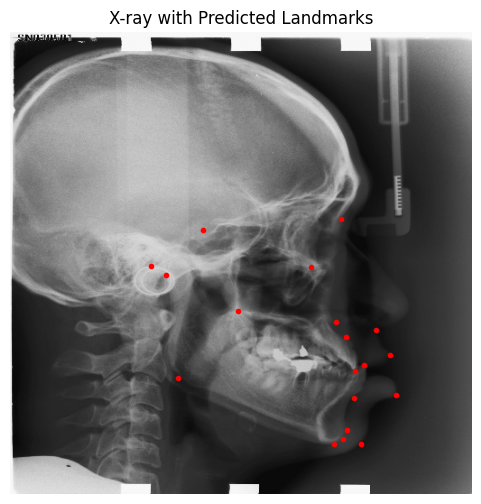

In [ ]:
# Example usage
img, heatmap = dataset[0]
print(f"Image shape: {img.shape}")
print(f"Heatmap shape: {heatmap.shape}")

import matplotlib.pyplot as plt
import numpy as np
# the annotated image with ground truth
img, heatmap = dataset[0]

img = img.squeeze()

landmarks = []
for i in range(heatmap.shape[-1]):
    hmap = heatmap[:, :, i]
    y, x = np.unravel_index(np.argmax(hmap), hmap.shape)
    landmarks.append((x, y))

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
for (x, y) in landmarks:
    plt.plot(x, y, 'ro', markersize=3)
plt.title("X-ray with Predicted Landmarks")
plt.axis('off')
plt.show()


In [ ]:
# unet model with 10 layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np


def unet(input_size=(512, 512, 1), num_landmarks=19):
    inputs = Input(input_size)

    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # bottleneck
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    conv10 = Conv2D(num_landmarks, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)

    loss_fn = BinaryCrossentropy(from_logits=False, reduction='sum')
    model.compile(optimizer=Adam(1e-4), loss= loss_fn)

    return model


In [ ]:
# apply unet model
model = unet(input_size=(512, 512, 1), num_landmarks=19)

model.fit(X, Y, batch_size=4, epochs=10, validation_split=0.3)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 249s 6s/step - loss: 262650.8750 - val_loss: 3372.4509
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - loss: 3026.1182 - val_loss: 4086.1570
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 1366.6427 - val_loss: 3342.9492
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - loss: 1034.6001 - val_loss: 3232.8840
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 870.1112 - val_loss: 3120.5208
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 793.1024 - val_loss: 5587.7412
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - loss: 773.0153 - val_loss: 1255.1942
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 775.1624 - val_loss: 1853.8964
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 648.5941 - val_loss: 3194.6121
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 603.3536 - val_loss: 1881.1969


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


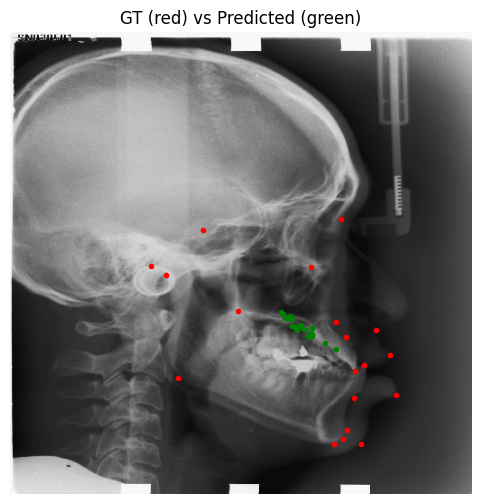

In [ ]:
# compare ground truth and predict annotated image
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import center_of_mass

def plot_landmark_comparison(img, gt_heatmap, pred_heatmap, title="GT (red) vs Predicted (green)"):

    if img.ndim == 3:
        img = img.squeeze()

    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')

    # ground truth（red）
    for i in range(gt_heatmap.shape[-1]):
        hmap = gt_heatmap[:, :, i]
        y, x = np.unravel_index(np.argmax(hmap), hmap.shape)
        plt.plot(x, y, 'ro', markersize=3)

    # predict（green）
    for i in range(pred_heatmap.shape[-1]):
        hmap = pred_heatmap[:, :, i]
        y, x = center_of_mass(hmap)
        plt.plot(x, y, 'go', markersize=3)


    plt.title(title)
    plt.axis('off')
    plt.show()

# the first image
img = X[0]
gt = Y[0]
pred = model.predict(np.expand_dims(img, axis=0))[0]

plot_landmark_comparison(img, gt, pred)
